In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score, roc_curve, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import binarize, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\sajal\OneDrive\Desktop\credit_train.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
df.shape

(100514, 19)

In [5]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [6]:
df.describe()


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [8]:
def missing_values_table(table):
    mis_val=table.isnull().sum()
    mis_val_percentage=100*table.isnull().sum()/len(table)
    mis_val_table=pd.concat([mis_val,mis_val_percentage],axis=1)
    
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'missing values',1:'% of missing values'})
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of missing values',ascending=False).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_ren_columns

In [9]:
missing_values_table(df)

Your selected dataframe has 19 columns.
There are 19 columns that have missing values.


,missing values,% of missing values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Years of Credit History,514,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5


In [10]:
df.drop(['Months since last delinquent'],axis=1,inplace=True) #more than 50% null values

In [11]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [12]:
df[df['Current Credit Balance'].isnull()==True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.drop(df.tail(514).index,inplace=True)
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 6 columns that have missing values.


,missing values,% of missing values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [14]:
for i in df['Maximum Open Credit'][df['Maximum Open Credit'].isnull() == True].index:
    df.drop(labels=i, inplace=True)
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 5 columns that have missing values.


,missing values,% of missing values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


In [15]:
for i in df['Tax Liens'][df['Tax Liens'].isnull() == True].index:
    df.drop(labels=i, inplace=True)
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 4 columns that have missing values.


,missing values,% of missing values
Credit Score,19149,19.2
Annual Income,19149,19.2
Years in current job,4222,4.2
Bankruptcies,194,0.2


In [16]:
for i in df['Bankruptcies'][df['Bankruptcies'].isnull() == True].index:
    df.drop(labels=i, inplace=True)
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 3 columns that have missing values.


,missing values,% of missing values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


<AxesSubplot:xlabel='Years in current job', ylabel='count'>

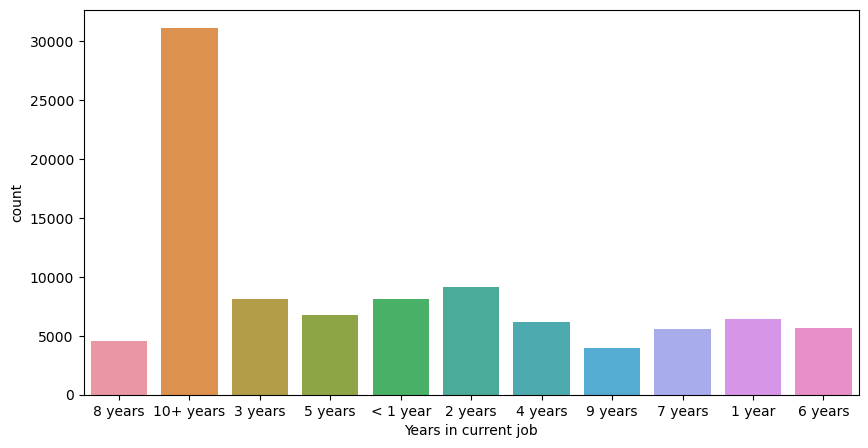

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df['Years in current job'])

In [18]:
df.loc[(df['Years in current job'])=='< 1 year','Years in current job']=0.5
df.loc[(df['Years in current job'])=='1 year','Years in current job']=1
df.loc[(df['Years in current job'])=='2 years','Years in current job']=2
df.loc[(df['Years in current job'])=='3 years','Years in current job']=3
df.loc[(df['Years in current job'])=='4 years','Years in current job']=4
df.loc[(df['Years in current job'])=='5 years','Years in current job']=5
df.loc[(df['Years in current job'])=='6 years','Years in current job']=6
df.loc[(df['Years in current job'])=='7 years','Years in current job']=7
df.loc[(df['Years in current job'])=='8 years','Years in current job']=8
df.loc[(df['Years in current job'])=='9 years','Years in current job']=9
df.loc[(df['Years in current job'])=='10+ years','Years in current job']=10

In [19]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [20]:
monthlydebtcount=df.groupby('Monthly Debt')['Loan ID'].count()
monthlydebtcount=monthlydebtcount.sort_values(ascending=False)
monthlydebtcount

Monthly Debt
0.00         70
15903.00      9
11162.88      9
10647.98      8
16279.20      8
             ..
7860.11       1
18210.36      1
18210.55      1
7859.35       1
435843.28     1
Name: Loan ID, Length: 65653, dtype: int64

In [21]:
df["Years in current job"]=df["Years in current job"].astype('float')

In [22]:
for f in ['Credit Score','Annual Income','Years in current job']:
    df.loc[df[f].isnull(),f]=df[f].mean()

In [23]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1076.275101,1.378339e+06,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1076.275101,1.378339e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [24]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,missing values,% of missing values


In [25]:
df.duplicated().sum()

10201

In [26]:
df=df.drop_duplicates(subset=['Loan ID'])

In [27]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99990    False
99996    False
99997    False
99998    False
99999    False
Length: 81822, dtype: bool

In [28]:
df.duplicated().sum()

0

In [29]:
df.Purpose=df.Purpose.str.replace('other','Other')

In [30]:
df.drop(['Loan ID', 'Customer ID'],axis=1,inplace=True)

In [31]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [32]:
categorical_subset=df[['Term','Home Ownership','Purpose']]
categorical_subset=pd.get_dummies(categorical_subset)
df.drop(labels=['Term','Home Ownership','Purpose'],axis=1,inplace=True)
df=pd.concat([df,categorical_subset],axis=1)

In [33]:
def remove_collinear_features(x, threshold):
   
    
   
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            
            if val >= threshold:
                
                drop_cols.append(col.values[0])

    
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    
    x['Loan Status'] = y
               
    return x

In [34]:
remove_collinear_features(df,0.6)

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status
0,445412.0,709.000000,1.167493e+06,8.000000,5214.74,17.2,6.0,1.0,228190.0,416746.0,...,0,1,0,0,0,0,0,0,0,Fully Paid
1,262328.0,1076.275101,1.378339e+06,10.000000,33295.98,21.1,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
2,99999999.0,741.000000,2.231892e+06,8.000000,29200.53,14.9,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
3,347666.0,721.000000,8.069490e+05,3.000000,8741.90,12.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
4,176220.0,1076.275101,1.378339e+06,5.000000,20639.70,6.1,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,99999999.0,742.000000,1.190046e+06,0.500000,11969.81,20.1,9.0,0.0,37392.0,134442.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
99996,99999999.0,732.000000,1.289416e+06,1.000000,13109.05,9.4,22.0,0.0,153045.0,509234.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
99997,103136.0,742.000000,1.150545e+06,6.000000,7315.57,18.8,12.0,1.0,109554.0,537548.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
99998,530332.0,746.000000,1.717524e+06,9.000000,9890.07,15.0,8.0,0.0,404225.0,738254.0,...,0,0,0,0,0,0,0,0,0,Fully Paid


In [35]:
df.shape

(81822, 34)

In [36]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,Fully Paid,445412.0,709.000000,1.167493e+06,8.0,5214.74,17.2,6.0,1.0,228190.0,...,1,0,0,0,0,0,0,0,0,0
1,Fully Paid,262328.0,1076.275101,1.378339e+06,10.0,33295.98,21.1,35.0,0.0,229976.0,...,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999.0,741.000000,2.231892e+06,8.0,29200.53,14.9,18.0,1.0,297996.0,...,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666.0,721.000000,8.069490e+05,3.0,8741.90,12.0,9.0,0.0,256329.0,...,0,0,0,0,0,0,0,0,0,0
4,Fully Paid,176220.0,1076.275101,1.378339e+06,5.0,20639.70,6.1,15.0,0.0,253460.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
features = df.drop(columns='Loan Status')
targets = pd.DataFrame(df['Loan Status'])


X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 50)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65457, 33)
(16365, 33)
(65457, 1)
(16365, 1)


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


from sklearn.preprocessing import  OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

In [39]:
y_train

array([1, 0, 1, ..., 1, 1, 1])

In [40]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [41]:
X_train

array([[ 2.73551974e+00, -3.16912110e-01, -1.02038992e+00, ...,
        -5.25117098e-02, -3.02898214e-02, -3.36421264e-02],
       [-3.68470507e-01, -3.00453639e-01, -1.52579154e-01, ...,
        -5.25117098e-02, -3.02898214e-02, -3.36421264e-02],
       [-3.71253065e-01, -3.18283649e-01, -8.68347797e-01, ...,
        -5.25117098e-02, -3.02898214e-02, -3.36421264e-02],
       ...,
       [-3.64820880e-01, -5.20163737e-02, -1.86318126e-03, ...,
        -5.25117098e-02, -3.02898214e-02, -3.36421264e-02],
       [-3.64266558e-01, -5.20163737e-02, -1.86318126e-03, ...,
        -5.25117098e-02, -3.02898214e-02, -3.36421264e-02],
       [-3.67383078e-01, -5.20163737e-02, -1.86318126e-03, ...,
        -5.25117098e-02, -3.02898214e-02, -3.36421264e-02]])

In [42]:
X_test

array([[-0.35608587, -0.33885674,  0.07225238, ..., -0.05251171,
        -0.03028982, -0.03364213],
       [-0.37239319, -0.29085286, -0.24870925, ..., -0.05251171,
        -0.03028982, -0.03364213],
       [-0.36044516, -0.05201637, -0.00186318, ..., -0.05251171,
        -0.03028982, -0.03364213],
       ...,
       [-0.37111209, -0.28262363, -0.01495655, ..., -0.05251171,
        -0.03028982, -0.03364213],
       [-0.3579555 , -0.27919478, -0.2612717 , ..., -0.05251171,
        -0.03028982, -0.03364213],
       [-0.37124827, -0.05201637, -0.00186318, ..., -0.05251171,
        -0.03028982, -0.03364213]])

In [43]:
def cross_val(X_train,y_train,model):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()
def fit_and_evaluate(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    return model_cross

In [44]:
logr=LogisticRegression()
logr_cross = fit_and_evaluate(logr)
print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.7826


In [45]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.7518


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the test set: Cross Validation Score = 0.7414


In [47]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.4571


In [48]:
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

[15:20:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

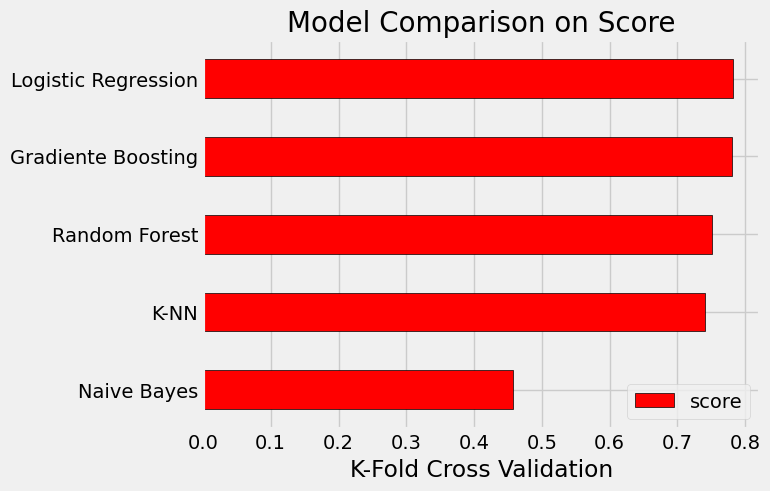

In [49]:
plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN',
                                           'Naive Bayes', 'Random Forest',
                                            'Gradiente Boosting'],
                                 'score': [logr_cross, knn_cross, naive_cross, 
                                         random_cross, gb_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);

In [50]:
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [51]:
model = XGBClassifier(random_state = 42)

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [52]:
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
[16:33:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:33:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [53]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,13.095547,0.702476,0.037784,0.006132,100,6,2,sqrt,2,ls,...,-0.217551,-0.216050,0.001341,1,-0.213355,-0.213676,-0.212271,-0.212556,-0.212964,0.000572
23,15.180647,0.229647,0.030547,0.006223,100,10,4,sqrt,3,huber,...,-0.218345,-0.216081,0.001468,2,-0.208425,-0.208808,-0.208461,-0.207076,-0.208193,0.000662
17,57.147333,0.925259,0.052378,0.003980,500,6,8,None,2,lad,...,-0.220362,-0.216997,0.002286,3,-0.202151,-0.203491,-0.203084,-0.201495,-0.202555,0.000782
0,34.808639,0.228039,0.047949,0.012794,100,2,6,auto,5,ls,...,-0.219323,-0.218067,0.001789,4,-0.188279,-0.189212,-0.188764,-0.189497,-0.188938,0.000462
9,81.244745,3.429901,0.059785,0.006029,500,4,2,auto,3,huber,...,-0.223295,-0.220129,0.002593,5,-0.181048,-0.181839,-0.180474,-0.180168,-0.180882,0.000636
7,65.427069,1.298591,0.041305,0.004462,500,4,6,auto,3,ls,...,-0.223295,-0.220129,0.002593,5,-0.181048,-0.181839,-0.180474,-0.180168,-0.180882,0.000636
19,157.411258,0.480826,0.101760,0.028006,1100,6,2,auto,3,lad,...,-0.229162,-0.227401,0.003376,7,-0.147682,-0.150694,-0.150021,-0.149736,-0.149533,0.001124
21,136.220602,0.376406,0.091048,0.012281,500,6,4,log2,5,huber,...,-0.230689,-0.228593,0.001961,8,-0.105862,-0.106879,-0.107694,-0.107429,-0.106966,0.000702
12,140.652975,1.510892,0.099626,0.012586,500,6,6,None,5,lad,...,-0.230689,-0.228593,0.001961,8,-0.105862,-0.106879,-0.107694,-0.107429,-0.106966,0.000702
3,172.095761,0.255623,0.130667,0.011695,500,6,8,None,5,huber,...,-0.230689,-0.228593,0.001961,8,-0.105862,-0.106879,-0.107694,-0.107429,-0.106966,0.000702


In [54]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, loss='ls',
              max_delta_step=0, max_depth=2, max_features='sqrt',
              min_child_weight=1, min_samples_leaf=2, min_samples_split=6,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', ...)

In [55]:
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = XGBClassifier(loss = 'ls', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [56]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
[16:55:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:55:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, loss='ls',
                                     max_delta_step=None, max_depth=5,
                                     max_features='auto', min_child_weight=None,
                                     min_samples...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None, ...),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

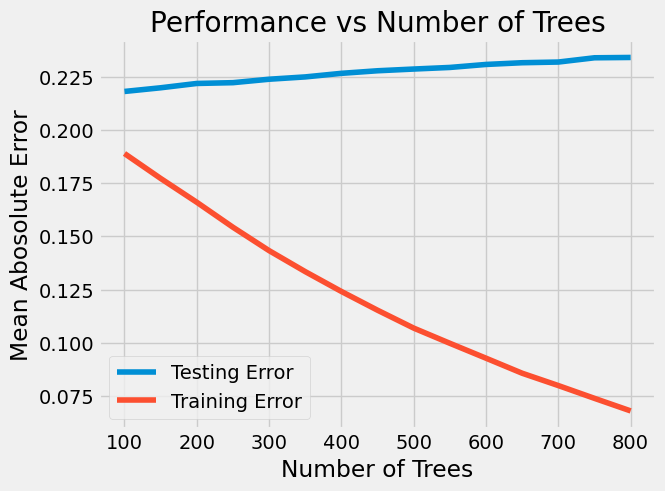

In [57]:
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize=(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');


In [58]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,16.244252,0.207611,0.041037,0.007902,100,{'n_estimators': 100},-0.217293,-0.215534,-0.220117,-0.219323,-0.218067,0.001789,1,-0.188279,-0.189212,-0.188764,-0.189497,-0.188938,0.000462
1,27.687409,0.143860,0.040307,0.006103,150,{'n_estimators': 150},-0.219982,-0.216390,-0.222073,-0.220728,-0.219793,0.002103,2,-0.176566,-0.177337,-0.176970,-0.178070,-0.177236,0.000553
2,43.517472,0.139561,0.056282,0.014825,200,{'n_estimators': 200},-0.222304,-0.218284,-0.225312,-0.221401,-0.221825,0.002505,3,-0.166239,-0.166215,-0.164647,-0.167071,-0.166043,0.000877
3,55.363605,0.477719,0.052420,0.005651,250,{'n_estimators': 250},-0.222304,-0.218773,-0.224701,-0.222989,-0.222192,0.002158,4,-0.154730,-0.155867,-0.151916,-0.154767,-0.154320,0.001461
4,73.043679,0.315283,0.053576,0.008898,300,{'n_estimators': 300},-0.226398,-0.219690,-0.224456,-0.224701,-0.223811,0.002494,5,-0.144423,-0.142566,-0.142118,-0.144257,-0.143341,0.001013


In [59]:
default_model = XGBClassifier(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, loss='ls',
              max_delta_step=0, max_depth=5, max_features='auto',
              min_child_weight=1, min_samples_leaf=6, min_samples_split=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', ...)

In [60]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

[16:55:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [61]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

[16:56:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:56:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bind

In [62]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 0.2167.
Final model performance on the test set:   MAE = 0.2166.


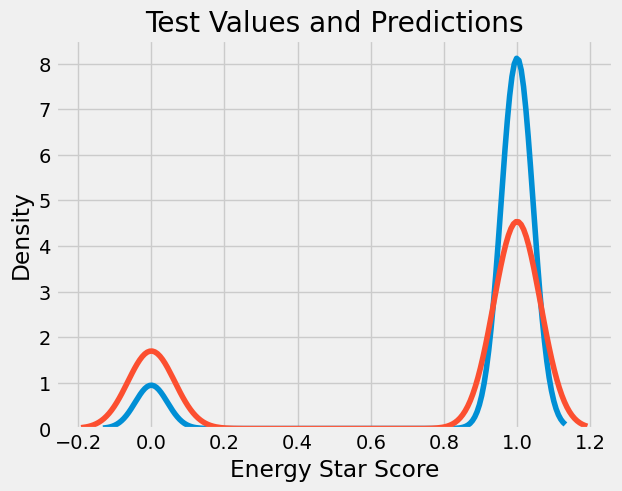

In [63]:
figsize=(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

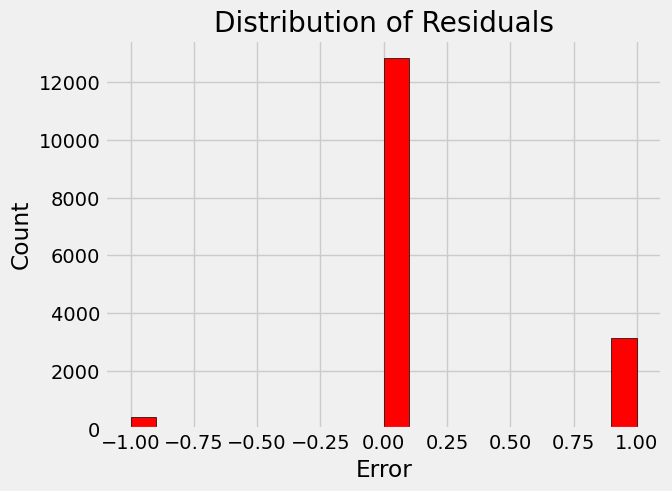

In [64]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

In [65]:
model.fit(X_train, y_train)

[16:56:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:56:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, loss='ls',
              max_delta_step=0, max_depth=5, max_features='auto',
              min_child_weight=1, min_samples_leaf=6, min_samples_split=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', ...)

In [66]:
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Term_Long Term,0.286856
1,Credit Score,0.244657
2,Current Loan Amount,0.081601
3,Home Ownership_Rent,0.039456
4,Purpose_Business Loan,0.032013
5,Annual Income,0.027036
6,Purpose_small_business,0.025875
7,Purpose_Buy a Car,0.016164
8,Maximum Open Credit,0.015795
9,Home Ownership_Home Mortgage,0.015085


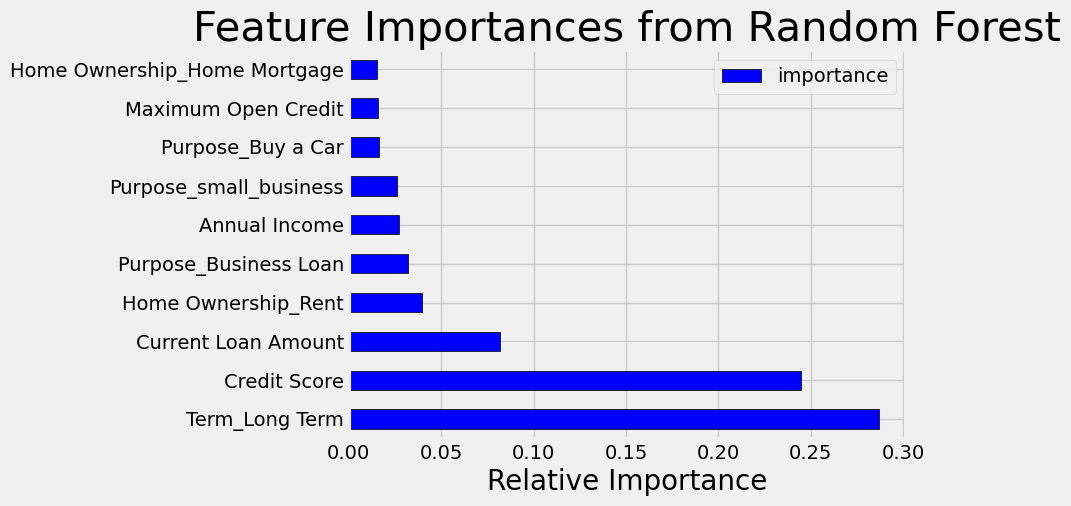

In [67]:
figsize=(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

In [68]:
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_train_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (65457, 10)
Most important testing  features shape:  (16365, 10)


In [69]:
logr = LogisticRegression()

# Fit on full set of features
logr.fit(X_train, y_train)
logr_full_pred = logr.predict(X_test)

# Fit on reduced set of features
logr.fit(X_train_reduced, y_train)
logr_reduced_pred = logr.predict(X_test_reduced)

# Display results
print('Logistic Regression Full Results: MAE =    %0.4f.' % mae(y_test, logr_full_pred))
print('Logistic Regression Reduced Results: MAE = %0.4f.' % mae(y_test, logr_reduced_pred))


Logistic Regression Full Results: MAE =    0.2164.
Logistic Regression Reduced Results: MAE = 0.2175.


In [70]:
model_reduced = XGBClassifier(loss='ls', max_depth=5, max_features='auto',
                                  min_samples_leaf=6, min_samples_split=2, 
                                  n_estimators=450, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_train_reduced, y_train)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

[16:57:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:57:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Gradient Boosted Reduced Results: MAE = 0.2239


In [71]:
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [74]:
import lime 
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train_reduced, 
                                                   mode = 'classification',
                                                   training_labels = y_train,
                                                   feature_names = list(most_important_features))

Prediction: 1.0000
Actual Value: 0.0000


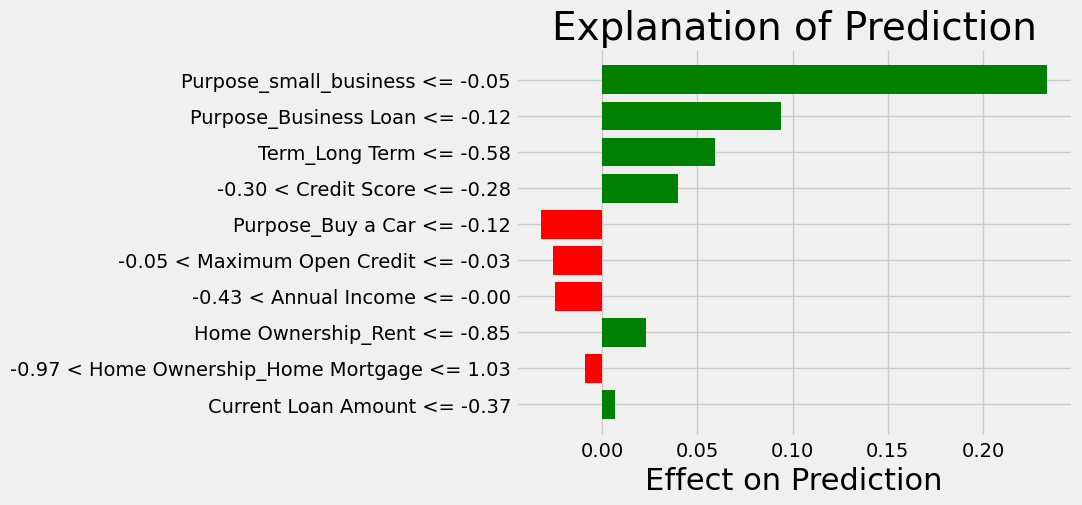

In [75]:
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict_proba,
                                      num_features=10)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);


Prediction: 1.0000
Actual Value: 1.0000


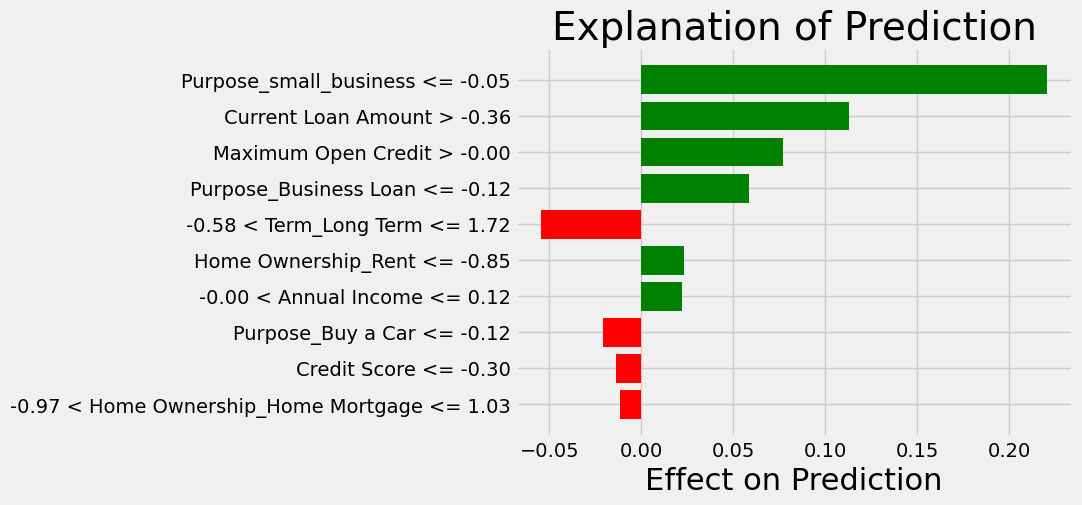

In [76]:
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict_proba, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);